In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quaternion_to_euler(w, x, y, z):
    """
    四元数 (w, x, y, z) 转换为欧拉角(roll, pitch, yaw) Z-Y-X转序 
    返回单位为弧度
    """
    # roll
    sinr_cosp = 2 * (w * x + y * z)
    cosr_cosp = 1 - 2 * (x * x + y * y)
    roll = np.atan2(sinr_cosp, cosr_cosp)

    # pitch
    sinp = 2 * (w * y - z * x)
    if abs(sinp) >= 1:
        pitch = np.copysign(np.pi / 2, sinp)
    else:
        pitch = np.asin(sinp)
        
    # yaw
    siny_cosp = 2 * (w * z + x * y)
    cosy_cosp = 1 - 2 * (y * y + z * z)
    yaw = np.atan2(siny_cosp, cosy_cosp)

    return roll, pitch, yaw  # 返回的是弧度

def quaternion_multiply(q1, q2):
    """
    计算两个四元数的乘积 (Hamilton积)
    输入: q1 = (w1, x1, y1, z1), q2 = (w2, x2, y2, z2)
    输出: 乘积四元数 (w, x, y, z)
    """
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    
    return np.array([w, x, y, z])

def unwrap_angle(current, previous):
    """
    角度解缠绕：保证相邻角度差<pi
    """
    while current - previous > np.pi:
        current -= 2*np.pi
    while current - previous < -np.pi:
        current += 2*np.pi
    return current

def quaternion_to_euler_with_gimbal_lock(w, x, y, z):
    """
    将四元数 (w, x, y, z) 转换为欧拉角 (roll, pitch, yaw)，单位：度
    包括 Gimbal Lock 特殊处理
    """
    sinp = 2 * (w * y - z * x)
    
    if abs(sinp) >= 0.9999:
        # 万向节锁时，直接计算 pitch，roll = 0，yaw 近似处理
        pitch = np.copysign(np.pi / 2, sinp)
        roll = 0
        yaw = np.copysign(-2 * np.atan2(x, w), sinp)
    else:
        # 正常情况
        pitch = np.asin(sinp)

        sinr_cosp = 2 * (w * x + y * z)
        cosr_cosp = 1 - 2 * (x * x + y * y)
        roll = np.atan2(sinr_cosp, cosr_cosp)

        siny_cosp = 2 * (w * z + x * y)
        cosy_cosp = 1 - 2 * (y * y + z * z)
        yaw = np.atan2(siny_cosp, cosy_cosp)

    return roll, pitch, yaw  # 返回的是弧度

In [4]:
roll, pitch, yaw = quaternion_to_euler(0.4218452, -0.2639032, -0.8226981, 0.2748991)
print(f"Roll: {np.degrees(roll):.2f}°")
print(f"Pitch: {np.degrees(pitch):.2f}°")
print(f"Yaw: {np.degrees(yaw):.2f}°")

Roll: -126.14°
Pitch: -33.30°
Yaw: 127.15°


In [15]:
# 旋转角度
angle = np.deg2rad(90)
qw, qx, qy, qz = np.cos(angle/2), 0, 0, np.sin(angle/2)
roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)

print(f"Roll: {np.degrees(roll):.2f}°")
print(f"Pitch: {np.degrees(pitch):.2f}°")
print(f"Yaw: {np.degrees(yaw):.2f}°")

Roll: 0.00°
Pitch: 0.00°
Yaw: 90.00°


In [16]:
# 连续旋转
angle = np.deg2rad(10)
# 绕x轴旋转10度(世界坐标系)
qx = [np.cos(angle/2), np.sin(angle/2), 0, 0]
# 绕y轴旋转10度(世界坐标系)
qy = [np.cos(angle/2), 0, np.sin(angle/2), 0]
# 绕z轴旋转10度(世界坐标系)
qz = [np.cos(angle/2), 0, 0, np.sin(angle/2)]

q = quaternion_multiply(qy, qx)
q = quaternion_multiply(qz, q)

roll, pitch, yaw = quaternion_to_euler(*q)
print(f"Roll: {np.degrees(roll):.2f}°")
print(f"Pitch: {np.degrees(pitch):.2f}°")
print(f"Yaw: {np.degrees(yaw):.2f}°")

Roll: 10.00°
Pitch: 10.00°
Yaw: 10.00°


Text(0, 0.5, 'Yaw(degrees)')

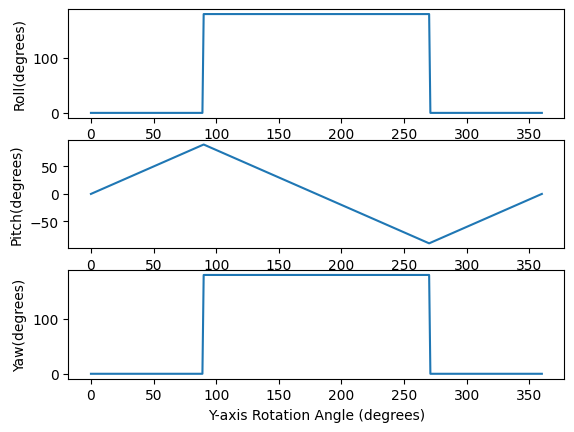

In [17]:
# 绘制绕Y轴旋转的四元数的欧拉角变化
angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qw, qx, qy, qz = np.cos(rad / 2), 0, np.sin(rad / 2), 0
    roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Y-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")

Text(0, 0.5, 'Yaw(degrees)')

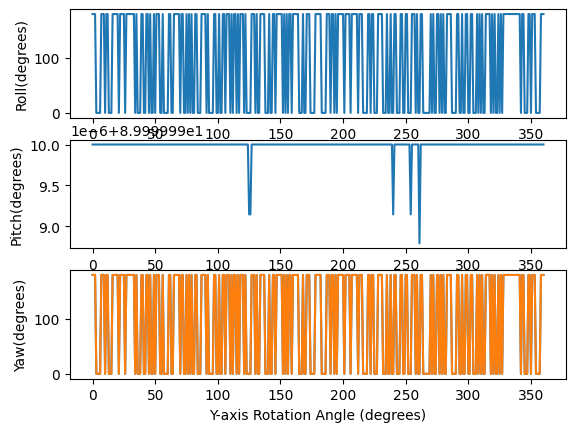

In [18]:
# 绘制绕Y轴旋转的四元数的欧拉角变化(解决跳变) 对比
angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qx = [np.cos(rad/2), np.sin(rad/2), 0, 0]
    qy = [np.cos(np.pi/4), 0, np.sin(np.pi/4), 0]
    # qz = [np.cos(rad/2), 0, 0, np.sin(rad/2)]
    # qz = [np.cos(np.pi/4), 0, 0, np.sin(np.pi/4)]
    qz = [1, 0, 0, 0]

    q = quaternion_multiply(qy, qx)
    q = quaternion_multiply(qz, q)
    
    roll, pitch, yaw = quaternion_to_euler(*q)
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Y-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")

Text(0, 0.5, 'Yaw(degrees)')

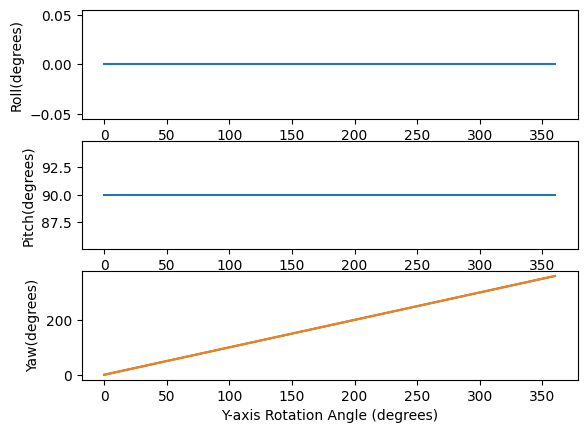

In [19]:
# 绘制绕Y轴旋转的四元数的欧拉角变化(解决跳变)
angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qx = [np.cos(rad/2), np.sin(rad/2), 0, 0]
    qy = [np.cos(np.pi/4), 0, np.sin(np.pi/4), 0]
    # qz = [np.cos(rad/2), 0, 0, np.sin(rad/2)]
    # qz = [np.cos(np.pi/4), 0, 0, np.sin(np.pi/4)]
    qz = [1, 0, 0, 0]

    q = quaternion_multiply(qy, qx)
    q = quaternion_multiply(qz, q)
    
    roll, pitch, yaw = quaternion_to_euler_with_gimbal_lock(*q)
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Y-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")

Text(0, 0.5, 'Yaw(degrees)')

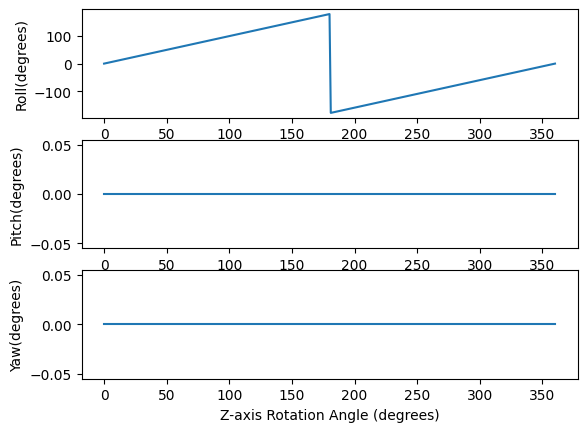

In [20]:
# 绘制绕X轴旋转的四元数的欧拉角变化
angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qw, qx, qy, qz = np.cos(rad / 2), np.sin(rad / 2), 0, 0
    roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Z-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")

Text(0, 0.5, 'Yaw(degrees)')

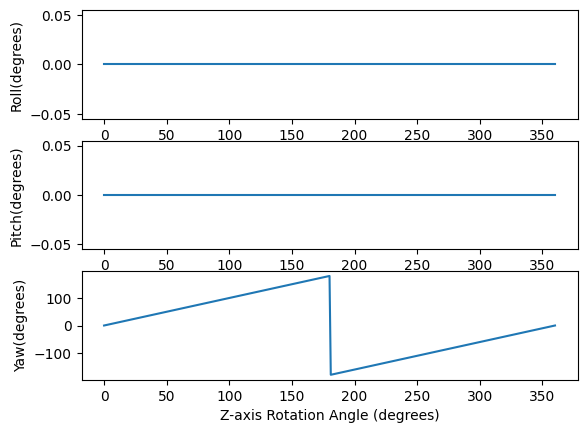

In [21]:
# 绘制绕Z轴旋转的四元数的欧拉角变化
angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qw, qx, qy, qz = np.cos(rad / 2), 0, 0, np.sin(rad / 2)
    roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Z-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")

Text(0, 0.5, 'Yaw(degrees)')

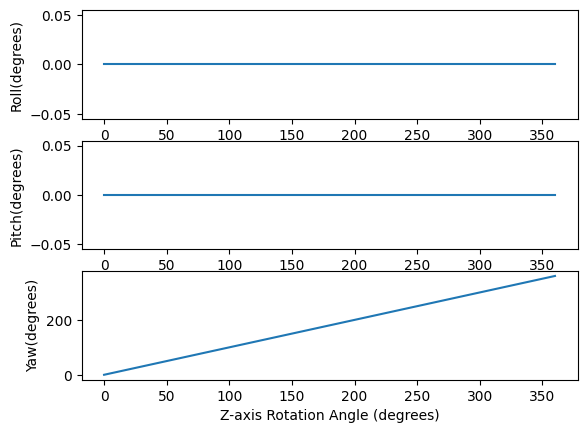

In [22]:
# 绘制绕Z轴旋转的四元数的欧拉角变化(防止跳变)
previous_yaw = 0

angles = np.linspace(0, 360, 361)  # 角度从0到360度
roll_values = []
pitch_values = []
yaw_values = []

for a in angles:
    rad = np.deg2rad(a)
    qw, qx, qy, qz = np.cos(rad / 2), 0, 0, np.sin(rad / 2)
    roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
    
    yaw = unwrap_angle(yaw, previous_yaw)
    previous_yaw = yaw
    
    roll_values.append(np.degrees(roll))
    pitch_values.append(np.degrees(pitch))
    yaw_values.append(np.degrees(yaw))

fig, ax = plt.subplots(3, 1)
plt.xlabel("Z-axis Rotation Angle (degrees)")
ax[0].plot(angles, roll_values)
ax[0].set_ylabel("Roll(degrees)")
ax[1].plot(angles, pitch_values)
ax[1].set_ylabel("Pitch(degrees)")
ax[2].plot(angles, yaw_values)
ax[2].set_ylabel("Yaw(degrees)")